#  Gradient descent
Implementation of algos from the [An overview of gradient descent optimization algorithms (arXiv:1609.04747)](https://arxiv.org/abs/1609.04747)
## Batch gradient descent

In [1]:
import seaborn as sns

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
def batch_gradient_descent(params, data, loss, epochs=1e4, eta=1e-4):
    loss_values = []
    for i in np.arange(epochs):
        params_grad = evaluate_gradient(loss, data, params)
        params = params - eta*params_grad
        loss_values.append(loss(data, params))
    return params, loss_values

In [4]:
evaluate_gradient = lambda loss, data, params, eta=1e-5: np.array([(loss(data, params+eta*i)-loss(data, params-eta*i))/(2*eta) for i in np.eye(params.shape[0])])

In [15]:
MSE = lambda data, params: np.sum(np.square(data[:,:-1].dot(params) - data[:,-1]))/data.shape[0]

In [16]:
f = lambda x1,x2,x3: x1+2*x2+3*x3+10*np.random.randn()

In [17]:
xx = np.linspace(-10, 10, 10)

In [18]:
data = np.array(list(zip(*map(lambda a: a.reshape(10**3), np.meshgrid(xx,xx,xx)),np.vectorize(f)(*np.meshgrid(xx,xx,xx)).reshape(10**3))))

In [19]:
params = np.array([1,1,1])

In [20]:
%%time
parms, lv = batch_gradient_descent(params, data, MSE)

CPU times: user 3.31 s, sys: 39.5 ms, total: 3.35 s
Wall time: 3.74 s


(array([0.95098152, 1.97293728, 3.01075275]),
 [<matplotlib.lines.Line2D at 0x11a4f2880>])

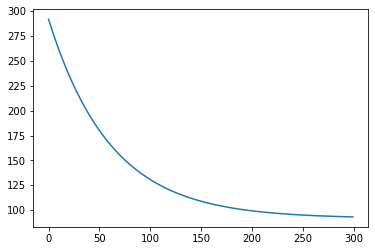

In [21]:
parms, plt.plot(lv[:300])

## Stochastic gradient descent

In [22]:
def stochastic_gradient_descent(params, data, loss, epochs=1e4, eta=1e-4):
    loss_values = []
    for i in np.arange(epochs):
        example = data[int(np.random.rand(1)[0]*data.shape[0])].reshape(1,-1)
        params_grad = evaluate_gradient(loss, example, params)
        params = params - eta*params_grad
        loss_values.append(loss(data, params))
    return params, loss_values

In [23]:
%%time
parms, lv = stochastic_gradient_descent(params, data, MSE)

CPU times: user 1.72 s, sys: 25.2 ms, total: 1.74 s
Wall time: 1.83 s


(array([0.89279266, 1.81951453, 2.95025113]),
 [<matplotlib.lines.Line2D at 0x11a74edc0>])

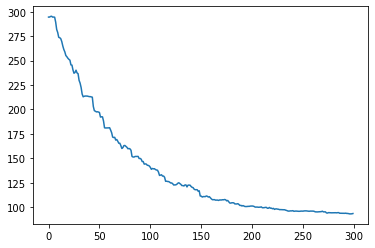

In [24]:
parms, plt.plot(lv[:300])

## Mini-batch gradient descent

In [25]:
def mini_batch_gradient_descent(params, data, loss, epochs=1e4, eta=1e-4, batch_size=50):
    loss_values = []
    for i in np.arange(epochs):
        example = data[[int(np.random.rand(1)[0]*data.shape[0]) for i in range(batch_size)]]
        params_grad = evaluate_gradient(loss, example, params)
        params = params - eta*params_grad
        loss_values.append(loss(data, params))
    return params, loss_values

In [26]:
%%time
parms, lv = mini_batch_gradient_descent(params, data, MSE, batch_size=5)

CPU times: user 2.34 s, sys: 41.1 ms, total: 2.38 s
Wall time: 2.55 s


(array([0.91670452, 1.92404059, 3.01481104]),
 [<matplotlib.lines.Line2D at 0x11a950be0>])

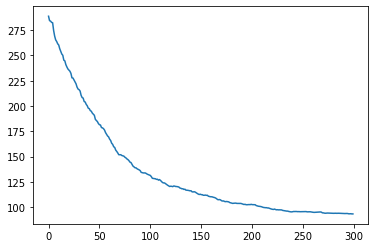

In [27]:
parms, plt.plot(lv[:300])

## Trying to solve the Boston dataset

In [28]:
from sklearn import datasets

In [29]:
boston_dataset = datasets.load_boston()

In [30]:
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [31]:
boston_dataset.data.shape

(506, 13)

In [32]:
boston_dataset.target.shape

(506,)

In [33]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [34]:
type(boston_dataset.data)

numpy.ndarray

In [35]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [36]:
import pandas as pd

In [37]:
dfb = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

In [38]:
dfb.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [39]:
sorted(dfb.CHAS.unique()), sorted(dfb.RAD.unique())

([0.0, 1.0], [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 24.0])

In [40]:
cat_feat = ["CHAS", "RAD"]

In [41]:
num_feat = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [42]:
dfb_post = dfb[num_feat]

In [43]:
dfb_post["CHAS_0"] = dfb.CHAS.apply(lambda x: 1 if x == 0 else 0)

<ipython-input-43-72ad88983c2e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfb_post["CHAS_0"] = dfb.CHAS.apply(lambda x: 1 if x == 0 else 0)


In [44]:
dfb_post["CHAS_1"] = dfb.CHAS.apply(lambda x: 1 if x == 1 else 0)

In [45]:
for rad in dfb.RAD.unique():
    dfb_post["RAD_" + str(int(rad))] = dfb.RAD.apply(lambda x: 1 if x == rad else 0)

In [46]:
dfb_post.columns.shape[0]

22

In [50]:
dfb_post

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,...,CHAS_1,RAD_1,RAD_2,RAD_3,RAD_5,RAD_4,RAD_8,RAD_6,RAD_7,RAD_24
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,...,0,1,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,...,0,0,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,...,0,0,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,...,0,0,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,273.0,21.0,391.99,...,0,1,0,0,0,0,0,0,0,0
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,273.0,21.0,396.90,...,0,1,0,0,0,0,0,0,0,0
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,273.0,21.0,396.90,...,0,1,0,0,0,0,0,0,0,0
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,273.0,21.0,393.45,...,0,1,0,0,0,0,0,0,0,0


In [37]:
dfb_post.values[:3]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 5.3800e-01, 6.5750e+00,
        6.5200e+01, 4.0900e+00, 2.9600e+02, 1.5300e+01, 3.9690e+02,
        4.9800e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 4.6900e-01, 6.4210e+00,
        7.8900e+01, 4.9671e+00, 2.4200e+02, 1.7800e+01, 3.9690e+02,
        9.1400e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 4.6900e-01, 7.1850e+00,
        6.1100e+01, 4.9671e+00, 2.4200e+02, 1.7800e+01, 3.9283e+02,
        4.0300e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00]])

In [38]:
dfb_post["FREE"] = np.ones(dfb_post.shape[0])

In [39]:
dfb_post["MEDV"] = boston_dataset.target

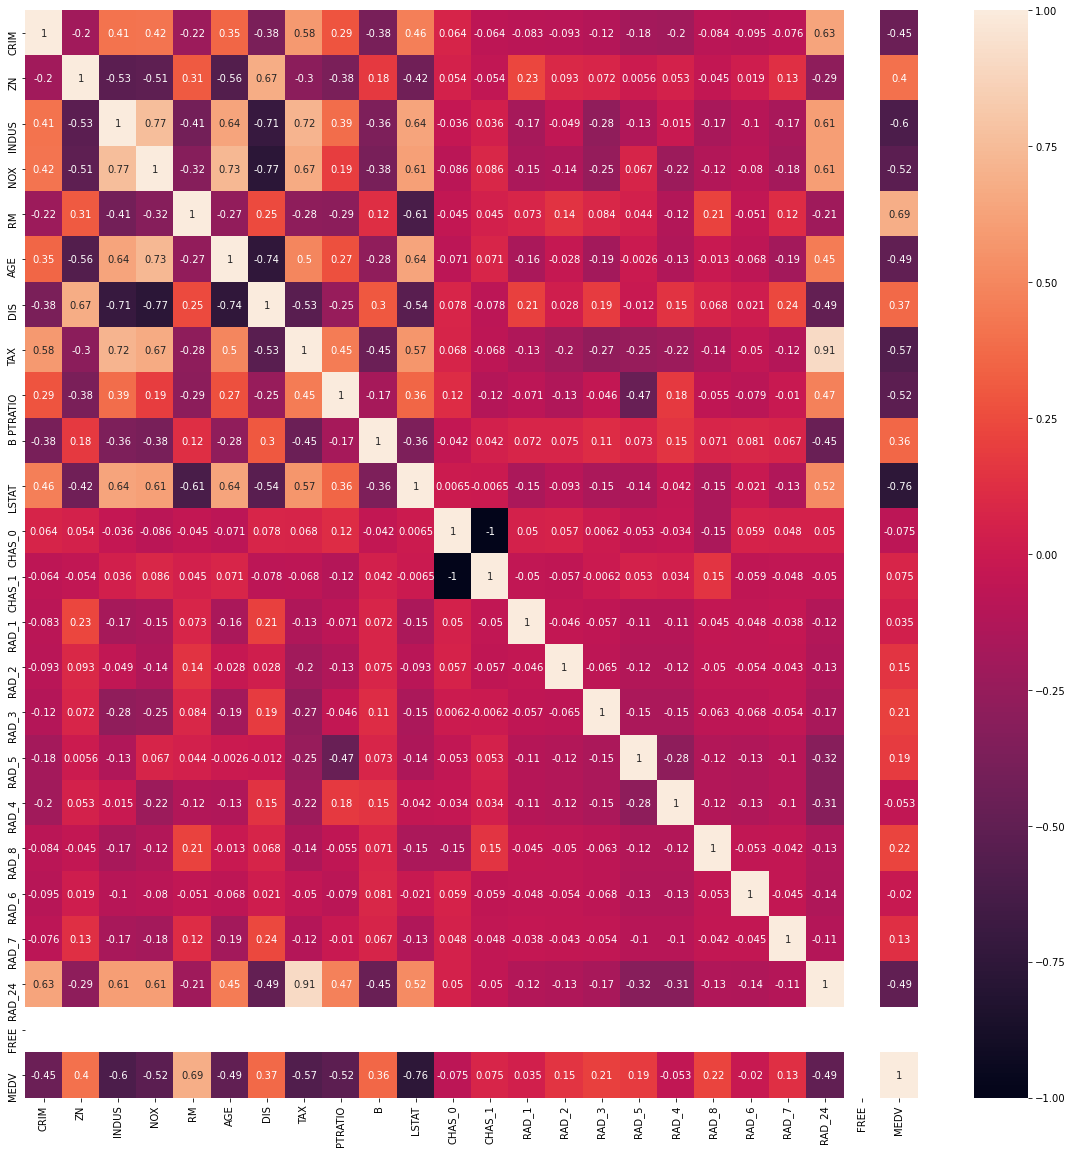

In [111]:
plt.figure(figsize=(20,20))
sns.heatmap(dfb_post.corr(), annot=True)

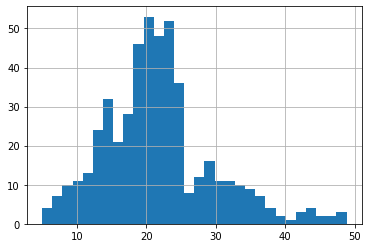

In [112]:
dfb_post["MEDV"].hist(bins=30)

In [42]:
dfb_post = dfb_post.drop(dfb_post[dfb_post.MEDV == 50].index)

In [43]:
data = dfb_post.values

In [44]:
data.shape

(490, 24)

In [45]:
parms, lv = batch_gradient_descent(np.ones(data.shape[1] - 1), data, MSE, eta=1e-6)

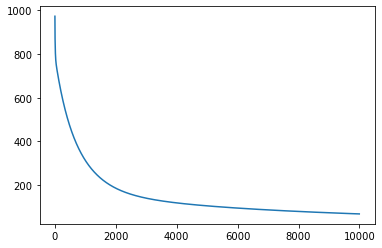

In [46]:
plt.plot(lv[4:10000])

In [47]:
parms

array([ 0.29202628,  0.09170355,  0.65388794,  0.994879  ,  1.01574196,
       -0.08214102,  0.9104655 , -0.04155504,  0.74954642,  0.01547573,
        0.16157266,  0.98965616,  1.00222133,  0.99541233,  0.99722985,
        1.00090042,  1.01013124,  0.97627189,  1.00820951,  1.00115173,
        1.00017746,  1.00239307,  0.99187749])

In [48]:
lv[-1]

67.8956911713689

# Gradient descent optimization algorithms

In [49]:
ordinary_step = lambda loss,data,params,step_state: (step_state["eta"]*evaluate_gradient(loss,data,params), step_state)

## Momentum

In [50]:
def momentum_step(loss,data,params,step_state):
    if "gamma" not in step_state:
        step_state["gamma"] = .9
    if "prev_step" not in step_state:
        step_state["prev_step"] = 0
    if "eta" not in step_state:
        step_state["eta"] = 1e-4
    new_step = step_state["gamma"]*step_state["prev_step"] + step_state["eta"]*evaluate_gradient(loss,data,params)
    step_state["prev_step"] = new_step
    return new_step, step_state

In [485]:
def stochastic_gradient_descent(params, data, loss, epochs=1e4, calc_step=ordinary_step, step_state={"eta": 1e-4}):
    loss_values = []
    lv_min = float("inf")
    parms = params
    for i in np.arange(epochs):
        example = data[int(np.random.rand()*data.shape[0])].reshape(1,-1)
        step, step_state = calc_step(loss, example, params, step_state)
        params = params - step
        lv = loss(data, params)
        if lv_min > lv:
            parms = params
        loss_values.append(lv)
    return parms, loss_values

In [52]:
parms, lv = stochastic_gradient_descent(np.ones(data.shape[1] - 1), data, MSE, step_state={"eta": 2e-7})

In [53]:
parms, min(lv)

(array([ 0.78027731,  0.38649702,  0.88939211,  0.99580207,  0.97240791,
         0.03848832,  0.96129821, -0.08826092,  0.87520682,  0.00665076,
         0.70158383,  0.99374357,  0.99959689,  0.99831877,  0.99824014,
         0.99983902,  0.99902235,  0.99380506,  1.00169209,  1.00062428,
         1.00023085,  1.0015679 ,  0.99334045]),
 182.74155348492877)

(0.0, 1000.0)

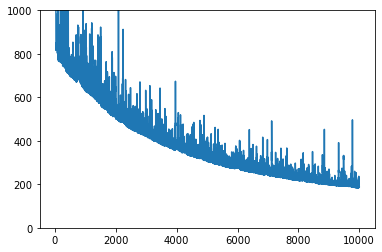

In [54]:
_, ax = plt.subplots(1,1)
ax.plot(lv)
ax.set_ylim((0,1000))

In [55]:
parms, lv = stochastic_gradient_descent(np.ones(data.shape[1] - 1), data, MSE, calc_step=momentum_step, step_state={"eta":1e-7,"gamma":.9})

In [56]:
parms, min(lv)

(array([ 0.34717765,  0.09232624,  0.64009547,  0.99473742,  1.02116932,
        -0.08635325,  0.91756047, -0.04548604,  0.7565778 ,  0.02353758,
         0.15736362,  0.9904851 ,  1.00181634,  0.99562338,  0.99722973,
         0.99995987,  1.01194296,  0.97665518,  1.00886649,  1.00133381,
         0.99990446,  1.00078557,  0.99230144]),
 69.92170399717828)

(0.0, 1000.0)

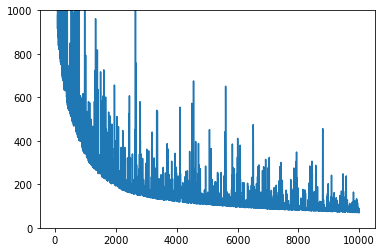

In [57]:
_, ax = plt.subplots(1,1)
ax.plot(lv)
ax.set_ylim((0,1000))

## Nesterov accelerated gradient (NAG)

In [58]:
def nesterov_step(loss,data,params,step_state):
    if "gamma" not in step_state:
        step_state["gamma"] = .9
    if "prev_step" not in step_state:
        step_state["prev_step"] = 0
    if "eta" not in step_state:
        step_state["eta"] = 1e-4
    new_step = step_state["gamma"]*step_state["prev_step"] + step_state["eta"]*evaluate_gradient(loss,data,params-step_state["gamma"]*step_state["prev_step"])
    step_state["prev_step"] = new_step
    return new_step, step_state

In [59]:
parms, lv = stochastic_gradient_descent(np.ones(data.shape[1] - 1), data, MSE, calc_step=nesterov_step, step_state={"eta":1e-7,"gamma":.9})

In [60]:
parms, min(lv)

(array([ 0.33347833,  0.08328181,  0.66211597,  0.9956662 ,  1.03142621,
        -0.09768882,  0.91820203, -0.04641955,  0.77651525,  0.01370344,
         0.17531299,  0.99209851,  1.00145776,  0.99578225,  0.99734762,
         0.99956624,  1.01255246,  0.97489819,  1.00802954,  1.00238486,
         0.99986296,  1.00313216,  0.99355627]),
 71.01266042427324)

(0.0, 1000.0)

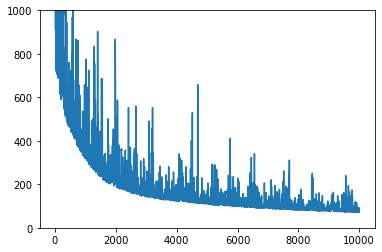

In [61]:
_, ax = plt.subplots(1,1)
ax.plot(lv)
ax.set_ylim((0,1000))

## Adagrad

In [62]:
def adagrad_step(loss,data,params,step_state):
    if "eps" not in step_state:
        step_state["eps"] = 1e-8
    if "G" not in step_state:
        step_state["G"] = np.zeros(params.shape[0])
    if "eta" not in step_state:
        step_state["eta"] = 1e-4
    grad = evaluate_gradient(loss,data,params)
    step_state["G"] = step_state["G"] + grad**2
    new_step = (step_state["eta"]/np.sqrt(step_state["G"]+step_state["eps"]))*grad
    return new_step, step_state

In [63]:
parms, lv = stochastic_gradient_descent(np.ones(data.shape[1] - 1), data, MSE, calc_step=adagrad_step, step_state={"eta":1})

In [64]:
parms, min(lv)

(array([-2.63389060e-02,  5.47810284e-02, -7.86005845e-02,  1.19111896e+00,
         2.93726149e+00,  1.15539770e-02, -8.38048855e-01, -6.17662212e-03,
         1.72591366e-01,  6.62624246e-03, -4.69716794e-01,  1.71352865e+00,
         2.81593385e+00, -1.34369046e+00,  3.99190354e+00,  4.85050077e+00,
         3.66120768e+00,  6.39066039e-01,  6.19196916e+00,  8.18502071e-01,
         3.61452263e+00,  2.61928778e-01,  1.65416760e+00]),
 16.64413434115599)

(0.0, 1000.0)

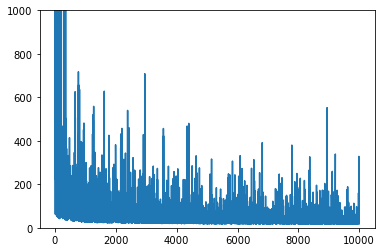

In [65]:
_, ax = plt.subplots(1,1)
ax.plot(lv)
ax.set_ylim((0,1000))

## Adadelta

In [66]:
def adadelta_step(loss,data,params,step_state):
    if "eps" not in step_state:
        step_state["eps"] = 1e-8
    if "Edp" not in step_state:
        step_state["Edp"] = np.zeros(params.shape[0])
    if "Eg" not in step_state:
        step_state["Eg"] = np.zeros(params.shape[0])
    if "gamma" not in step_state:
        step_state["gamma"] = .9
    grad = evaluate_gradient(loss,data,params)
    step_state["Eg"] = step_state["gamma"]*step_state["Eg"] + (1 - step_state["gamma"])*np.square(grad)
    RMS_Eg = np.sqrt(step_state["Eg"] + step_state["eps"])
    RMS_Edp = np.sqrt(step_state["Edp"] + step_state["eps"])
    new_step = RMS_Edp / RMS_Eg * grad
    step_state["Edp"] = step_state["gamma"]*step_state["Edp"] + (1 - step_state["gamma"])*np.square(new_step)
    return new_step, step_state

In [67]:
parms, lv = stochastic_gradient_descent(np.ones(data.shape[1] - 1), data, MSE, epochs=1e4, calc_step=adadelta_step, step_state={"gamma":.9})

In [68]:
parms, min(lv)

(array([ 0.54791695,  0.77147492,  0.12275999, -0.11748965, -0.4610565 ,
         0.02948325,  0.26100344,  0.01385681, -0.28793741,  0.0198676 ,
         0.18109188, -0.33962032,  0.99769998,  0.96970974,  1.00369274,
         1.03954239,  0.98513531,  0.93931718,  1.03522337,  0.9954481 ,
         1.00906575,  0.24669868, -0.46326338]),
 295.47145095891807)

(0.0, 1000.0)

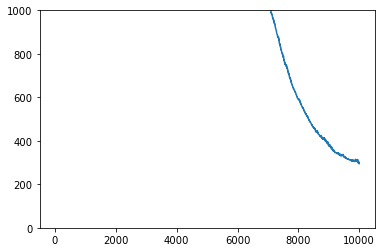

In [69]:
_, ax = plt.subplots(1,1)
ax.plot(lv)
ax.set_ylim((0,1000))

## RMSprop

In [387]:
def rmsprop_step(loss,data,params,step_state):
    if "eps" not in step_state:
        step_state["eps"] = 1e-8
    if "eta" not in step_state:
        step_state["eta"] = 1e-3
    if "Eg" not in step_state:
        step_state["Eg"] = np.zeros(params.shape[0])
    if "gamma" not in step_state:
        step_state["gamma"] = .9
    grad = evaluate_gradient(loss,data,params)
    step_state["Eg"] = step_state["gamma"]*step_state["Eg"] + (1 - step_state["gamma"])*grad**2
    RMS_Eg = np.sqrt(step_state["Eg"] + step_state["eps"])
    new_step = step_state["eta"] / RMS_Eg * grad
    return new_step, step_state

In [388]:
parms, lv = stochastic_gradient_descent(np.ones(data.shape[1] - 1), data, MSE, epochs=1e4, calc_step=rmsprop_step, step_state={"gamma":.9, "eta":15e-3})

In [389]:
parms, min(lv)

(array([-0.04916666,  0.02974039, -0.04491566,  1.74918902,  3.06859038,
        -0.04665709, -0.60904652, -0.02488456,  0.13754053, -0.01169757,
        -0.46326315,  1.38575351,  3.21436672, -1.18044334,  1.89701932,
         3.93875405,  2.4498795 , -0.28728485,  3.38341028,  0.17412004,
         1.77179238,  0.41167126,  2.09531323]),
 16.71561119965681)

(0.0, 1000.0)

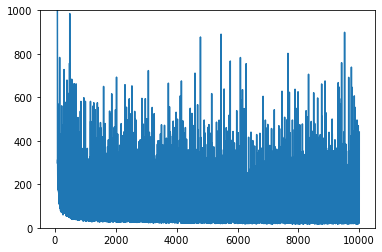

In [390]:
_, ax = plt.subplots(1,1)
ax.plot(lv)
ax.set_ylim((0,1000))

## Adam

In [74]:
def adam_step(loss,data,params,step_state):
    if "eps" not in step_state:
        step_state["eps"] = 1e-8
    if "eta" not in step_state:
        step_state["eta"] = 1e-4
    if "beta1" not in step_state:
        step_state["beta1"] = .9
    if "beta2" not in step_state:
        step_state["beta2"] = .999
    if "t" not in step_state:
        step_state["t"] = 0
    if "mt" not in step_state:
        step_state["mt"] = np.ones(params.shape[0])
    if "vt" not in step_state:
        step_state["vt"] = np.ones(params.shape[0])
    step_state["t"] = step_state["t"] + 1
    grad = evaluate_gradient(loss,data,params)
    step_state["mt"] = step_state["beta1"]*step_state["mt"] + (1-step_state["beta1"])*grad
    step_state["vt"] = step_state["beta2"]*step_state["vt"] + (1-step_state["beta2"])*np.square(grad)
    m = step_state["mt"]/(1 - step_state["beta1"]**step_state["t"])
    v = step_state["vt"]/(1 - step_state["beta2"]**step_state["t"])
    new_step = step_state["eta"]*m/(np.sqrt(v) + step_state["eps"])
    return new_step, step_state

In [75]:
parms, lv = stochastic_gradient_descent(np.ones(data.shape[1] - 1),
                                        data,
                                        MSE,
                                        epochs=1e4,
                                        calc_step=adam_step,
                                        step_state={"eta":2e-2})

In [76]:
parms, min(lv)

(array([-0.28524723,  0.0790534 , -0.21747412,  1.54410932,  3.55490864,
         0.01498581, -0.79331131, -0.02583024, -0.01184661,  0.01064135,
        -0.34494649,  1.97098322,  1.9970324 , -1.32811967,  3.62458619,
         4.00687593,  2.547206  ,  0.74249986,  3.7317844 ,  0.44448853,
         2.15204562,  0.31994635,  2.21690905]),
 16.08656502134831)

(0.0, 1000.0)

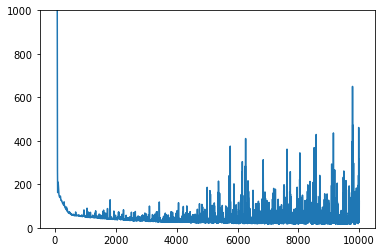

In [77]:
_, ax = plt.subplots(1,1)
ax.plot(lv)
ax.set_ylim((0,1000))

## AdaMax

In [78]:
def adamax_step(loss,data,params,step_state):
    if "eps" not in step_state:
        step_state["eps"] = 1e-8
    if "eta" not in step_state:
        step_state["eta"] = 1e-4
    if "beta1" not in step_state:
        step_state["beta1"] = .9
    if "beta2" not in step_state:
        step_state["beta2"] = .999
    if "t" not in step_state:
        step_state["t"] = 0
    if "mt" not in step_state:
        step_state["mt"] = np.ones(params.shape[0])
    if "vt" not in step_state:
        step_state["vt"] = np.ones(params.shape[0])
    step_state["t"] = step_state["t"] + 1
    grad = evaluate_gradient(loss,data,params)
    step_state["mt"] = step_state["beta1"]*step_state["mt"] + (1-step_state["beta1"])*grad
    step_state["vt"] = np.max(np.vstack((step_state["beta2"]*step_state["vt"], np.abs(grad) + step_state["eps"])), 0)
    m = step_state["mt"]/(1 - step_state["beta1"]**step_state["t"])
    new_step = step_state["eta"]*m/step_state["vt"]
    return new_step, step_state

In [79]:
parms, lv = stochastic_gradient_descent(np.ones(data.shape[1] - 1),
                                        data,
                                        MSE,
                                        epochs=1e4,
                                        calc_step=adamax_step,
                                        step_state={"eta":1e-1})

In [80]:
parms, min(lv)

(array([-0.02633086,  0.04342778, -0.10361994,  1.44763762,  4.37288339,
        -0.06036743, -0.9289325 ,  0.01406853, -0.14900226,  0.02875279,
        -0.23924471,  1.49256196,  1.58647811, -4.01866581,  0.47969722,
         2.0665069 ,  0.24494588, -1.08677881,  2.57283793, -1.3153675 ,
         0.77410815, -0.53208903,  2.80364186]),
 14.76385629445961)

(0.0, 1000.0)

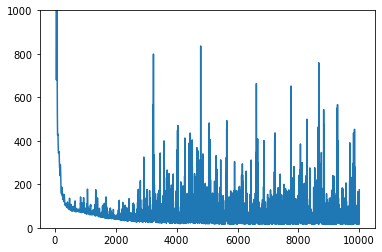

In [81]:
_, ax = plt.subplots(1,1)
ax.plot(lv)
ax.set_ylim((0,1000))

## Nadam (NAG + Adam)

In [82]:
def nadam_step(loss,data,params,step_state):
    if "eps" not in step_state:
        step_state["eps"] = 1e-8
    if "eta" not in step_state:
        step_state["eta"] = 1e-4
    if "beta1" not in step_state:
        step_state["beta1"] = .9
    if "beta2" not in step_state:
        step_state["beta2"] = .999
    if "t" not in step_state:
        step_state["t"] = 0
    if "mt" not in step_state:
        step_state["mt"] = np.ones(params.shape[0])
    if "vt" not in step_state:
        step_state["vt"] = np.ones(params.shape[0])
    step_state["t"] = step_state["t"] + 1
    grad = evaluate_gradient(loss,data,params)
    step_state["mt"] = step_state["beta1"]*step_state["mt"] + (1-step_state["beta1"])*grad
    step_state["vt"] = step_state["beta2"]*step_state["vt"] + (1-step_state["beta2"])*np.square(grad)
    m = step_state["mt"]/(1 - step_state["beta1"]**step_state["t"])
    v = step_state["vt"]/(1 - step_state["beta2"]**step_state["t"])
    new_step = step_state["eta"]*(step_state["beta1"]*m + (1 - step_state["beta1"])*grad/(1 - step_state["beta1"]**step_state["t"]))/(np.sqrt(v) + step_state["eps"])
    return new_step, step_state

In [367]:
parms, lv = stochastic_gradient_descent(np.ones(data.shape[1] - 1),
                                        data,
                                        MSE,
                                        epochs=1e4,
                                        calc_step=nadam_step,
                                        step_state={"eta":2e-2})

In [368]:
parms, min(lv)

(array([-5.70943485e-02,  7.68362798e-02, -1.64887824e-01,  1.16296149e+00,
         3.55203479e+00, -2.45781568e-02, -9.55074767e-01, -1.60843051e-04,
         1.24933027e-02,  1.39490323e-02, -5.69323309e-01,  2.10776467e+00,
         3.37216445e+00, -1.30670219e+00,  2.28774139e+00,  4.46456378e+00,
         2.60693732e+00,  1.10503928e+00,  5.46383676e+00, -4.04528136e-01,
         1.64004901e+00,  4.93919076e-01,  2.27806626e+00]),
 15.610616837015082)

(0.0, 1000.0)

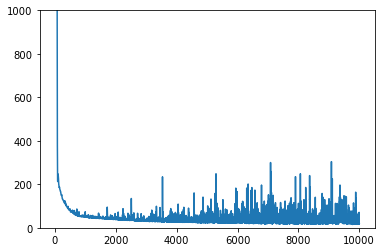

In [369]:
_, ax = plt.subplots(1,1)
ax.plot(lv)
ax.set_ylim((0,1000))

# New York Stock Exchange
Dataset from [kaggle](https://www.kaggle.com/dgawlik/nyse)  
S&P 500 companies historical prices with fundamental data  

In [120]:
!ls | grep csv

fundamentals.csv
prices-split-adjusted.csv
prices.csv
securities.csv


In [121]:
files = ["fundamentals.csv", "prices-split-adjusted.csv", "prices.csv", "securities.csv"]

In [138]:
fund = pd.read_csv(files[0], index_col=0)

In [164]:
fund.shape

(1781, 78)

In [167]:
with pd.option_context('display.max_columns', None):
    display(fund)

,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,Cost of Revenue,Current Ratio,Deferred Asset Charges,Deferred Liability Charges,Depreciation,Earnings Before Interest and Tax,Earnings Before Tax,Effect of Exchange Rate,Equity Earnings/Loss Unconsolidated Subsidiary,Fixed Assets,Goodwill,Gross Margin,Gross Profit,Income Tax,Intangible Assets,Interest Expense,Inventory,Investments,Liabilities,Long-Term Debt,Long-Term Investments,Minority Interest,Misc. Stocks,Net Borrowings,Net Cash Flow,Net Cash Flow-Operating,Net Cash Flows-Financing,Net Cash Flows-Investing,Net Income,Net Income Adjustments,Net Income Applicable to Common Shareholders,Net Income-Cont. Operations,Net Receivables,Non-Recurring Items,Operating Income,Operating Margin,Other Assets,Other Current Assets,Other Current Liabilities,Other Equity,Other Financing Activities,Other Investing Activities,Other Liabilities,Other Operating Activities,Other Operating Items,Pre-Tax Margin,Pre-Tax ROE,Profit Margin,Quick Ratio,Research and Development,Retained Earnings,Sale and Purchase of Stock,"Sales, General and Admin.",Short-Term Debt / Current Portion of Long-Term Debt,Short-Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,1.270000e+08,1.049900e+10,78.0,0.000000e+00,223000000.0,1.001000e+09,-1.813000e+09,-2.445000e+09,0.0,0.0,1.340200e+10,0.000000e+00,58.0,1.435600e+10,-5.690000e+08,8.690000e+08,632000000.0,5.800000e+08,3.060000e+08,4.730000e+08,7.116000e+09,0.000000e+00,0.0,0.0,-1.020000e+09,197000000.0,1.285000e+09,4.830000e+08,-1.571000e+09,-1.876000e+09,2.050000e+09,-1.876000e+09,-4.084000e+09,1.124000e+09,3.860000e+08,1.480000e+08,1.0,2.167000e+09,6.260000e+08,4.524000e+09,-2.980000e+09,1.509000e+09,11000000.0,1.514700e+10,-141000000.0,8.450000e+08,10.0,31.0,8.0,72.0,0.0,-9.462000e+09,0.000000e+00,1.297700e+10,1.419000e+09,3.412000e+09,2.351000e+10,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,5.000000e+06,1.101900e+10,104.0,0.000000e+00,935000000.0,1.020000e+09,-1.324000e+09,-2.180000e+09,0.0,0.0,1.925900e+10,4.086000e+09,59.0,1.572400e+10,-3.460000e+08,2.311000e+09,856000000.0,1.012000e+09,-1.181000e+09,-2.350000e+08,1.535300e+10,0.000000e+00,0.0,0.0,2.208000e+09,660000000.0,6.750000e+08,3.799000e+09,-3.814000e+09,-1.834000e+09,1.873000e+09,-1.834000e+09,-4.489000e+09,1.560000e+09,5.590000e+08,1.399000e+09,5.0,2.299000e+09,1.465000e+09,7.385000e+09,-2.032000e+09,1.711000e+09,481000000.0,1.491500e+10,-56000000.0,8.530000e+08,8.0,80.0,7.0,96.0,0.0,-1.129600e+10,0.000000e+00,1.291300e+10,1.446000e+09,8.111000e+09,4.227800e+10,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,0.0,7.000000e+06,1.562000e+10,88.0,0.000000e+00,829000000.0,1.342000e+09,4.099000e+09,3.212000e+09,0.0,0.0,2.308400e+10,4.091000e+09,63.0,2.703000e+10,3.300000e+08,2.240000e+09,887000000.0,1.004000e+09,1.799000e+09,-1.026000e+09,1.604300e+10,0.000000e+00,0.0,0.0,1.700000e+08,-146000000.0,3.080000e+09,-3.150000e+08,-2.911000e+09,2.882000e+09,5.420000e+08,2.882000e+09,2.882000e+09,1.771000e+09,8.000000e+08,4.249000e+09,10.0,2.060000e+09,8.980000e+08,7.059000e+09,-4.559000e+09,8.170000e+08,601000000.0,1.092800e+10,-500000000.0,1.295000e+09,8.0,159.0,7.0,80.0,0.0,-8.562000e+09,-1.052000e+09,2.068600e+10,1.677000e+09,6

In [139]:
fund.columns

Index(['Ticker Symbol', 'Period Ending', 'Accounts Payable',
       'Accounts Receivable', 'Add'l income/expense items', 'After Tax ROE',
       'Capital Expenditures', 'Capital Surplus', 'Cash Ratio',
       'Cash and Cash Equivalents', 'Changes in Inventories', 'Common Stocks',
       'Cost of Revenue', 'Current Ratio', 'Deferred Asset Charges',
       'Deferred Liability Charges', 'Depreciation',
       'Earnings Before Interest and Tax', 'Earnings Before Tax',
       'Effect of Exchange Rate',
       'Equity Earnings/Loss Unconsolidated Subsidiary', 'Fixed Assets',
       'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax',
       'Intangible Assets', 'Interest Expense', 'Inventory', 'Investments',
       'Liabilities', 'Long-Term Debt', 'Long-Term Investments',
       'Minority Interest', 'Misc. Stocks', 'Net Borrowings', 'Net Cash Flow',
       'Net Cash Flow-Operating', 'Net Cash Flows-Financing',
       'Net Cash Flows-Investing', 'Net Income', 'Net Income Adjustments',
  

In [130]:
fund.shape

(1781, 78)

In [221]:
prices = pd.read_csv(files[2])

In [222]:
prices.shape

(851264, 7)

In [223]:
prices.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [151]:
sec = pd.read_csv(files[3])

In [152]:
sec.head()

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877


In [161]:
sec.shape

(505, 8)

In [162]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(sec)

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877
5,AYI,Acuity Brands Inc,reports,Industrials,Electrical Components & Equipment,"Atlanta, Georgia",2016-05-03,1144215
6,ADBE,Adobe Systems Inc,reports,Information Technology,Application Software,"San Jose, California",1997-05-05,796343
7,AAP,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Roanoke, Virginia",2015-07-09,1158449
8,AES,AES Corp,reports,Utilities,Independent Power Producers & Energy Traders,"Arlington, Virginia",NaN,874761
9,AET,Aetna Inc,reports,Health Care,Managed Health Care,"Hartford, Connecticut",1976-06-30,1122304


In [262]:
price_googl = prices[prices.symbol == "GOOGL"].loc[:,:]

In [263]:
price_googl["date"] = pd.to_datetime(price_googl.date)

<ipython-input-263-6fecddee9059>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_googl["date"] = pd.to_datetime(price_googl.date)


In [264]:
price_googl["weekday"] = price_googl.iloc[:,0].dt.weekday

<ipython-input-264-cb0c0db7ebdf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_googl["weekday"] = price_googl.iloc[:,0].dt.weekday


In [265]:
price_googl.weekday.unique()

array([0, 1, 2, 3, 4])

In [266]:
for i in price_googl.weekday.unique():
    price_googl["weekday" + str(i)] = price_googl.weekday.apply(lambda x: 1 if x == i else 0)

<ipython-input-266-e3347fdaf8b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_googl["weekday" + str(i)] = price_googl.weekday.apply(lambda x: 1 if x == i else 0)


In [267]:
price_googl["diff_norm"] = price_googl[["high", "low", "open"]].apply(lambda row: (row[0] - row[1])/row[2], axis=1)

<ipython-input-267-c212397bd611>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_googl["diff_norm"] = price_googl[["high", "low", "open"]].apply(lambda row: (row[0] - row[1])/row[2], axis=1)


In [268]:
price_googl["FREE"] = 1

<ipython-input-268-cf3525557174>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_googl["FREE"] = 1


In [272]:
price_googl = price_googl[["open", "low", "high", "volume", "weekday0", "weekday1", "weekday2", "weekday3", "weekday4", "diff_norm", "FREE", "close"]]

In [274]:
price_googl.corrwith(price_googl.close)

open         0.998870
low          0.999557
high         0.999447
volume      -0.142057
weekday0     0.001701
weekday1     0.001410
weekday2    -0.002695
weekday3    -0.002952
weekday4     0.002598
diff_norm   -0.187440
FREE              NaN
close        1.000000
dtype: float64

In [275]:
data_nyse = price_googl.values

In [499]:
parms, lv = stochastic_gradient_descent(np.zeros(data_nyse.shape[1] - 1),
                                        data_nyse,
                                        MSE,
                                        step_state={"eta": 1e-17})

In [500]:
parms, min(lv)

(array([4.95674692e-08, 4.92323177e-08, 4.99093939e-08, 1.07364208e-04,
        1.28488343e-11, 1.37455502e-11, 1.44341195e-11, 1.30329232e-11,
        9.94418614e-12, 8.66101638e-13, 6.40056132e-11]),
 191877.2034003324)

(0.0, 1000000.0)

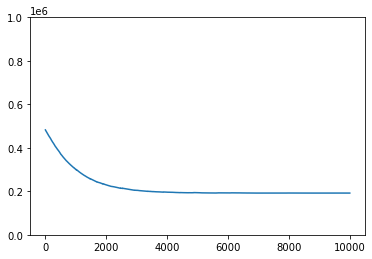

In [501]:
_, ax = plt.subplots(1,1)
ax.plot(lv)
ax.set_ylim((0,1e6))

In [502]:
parms, lv = stochastic_gradient_descent(np.zeros(data_nyse.shape[1] - 1),
                                        data_nyse,
                                        MSE,
                                        calc_step=momentum_step,
                                        step_state={"eta":1e-17,"gamma":.9})

In [503]:
parms, min(lv)

(array([3.93821565e-07, 3.91629163e-07, 3.96296781e-07, 1.13397990e-04,
        1.03800535e-10, 1.01198140e-10, 1.15622657e-10, 1.00351050e-10,
        6.48863334e-11, 5.41945902e-12, 4.85858716e-10]),
 191876.8411468211)

(0.0, 1000000.0)

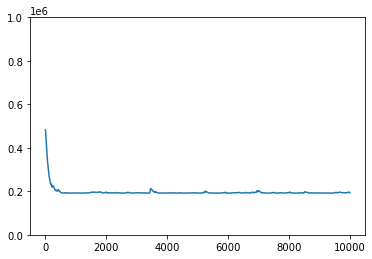

In [504]:
_, ax = plt.subplots(1,1)
ax.plot(lv)
ax.set_ylim((0,1e6))

In [505]:
parms, lv = stochastic_gradient_descent(np.zeros(data_nyse.shape[1] - 1),
                                        data_nyse,
                                        MSE,
                                        calc_step=nesterov_step,
                                        step_state={"eta":1e-17,"gamma":.9})

In [506]:
parms, min(lv)

(array([3.97346988e-07, 3.95250798e-07, 3.99818479e-07, 1.11512349e-04,
        9.92752829e-11, 1.06429551e-10, 1.16992582e-10, 9.86767425e-11,
        6.53775704e-11, 5.23738437e-12, 4.86751728e-10]),
 191876.8159723656)

(0.0, 1000000.0)

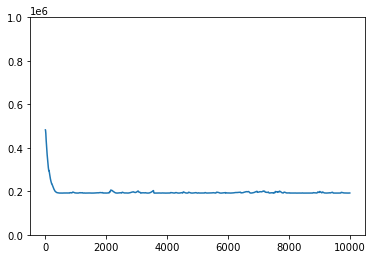

In [507]:
_, ax = plt.subplots(1,1)
ax.plot(lv)
ax.set_ylim((0,1e6))

In [508]:
parms, lv = stochastic_gradient_descent(np.zeros(data_nyse.shape[1] - 1),
                                        data_nyse,
                                        MSE,
                                        calc_step=adagrad_step,
                                        step_state={"eta":1e-1})

In [509]:
parms, min(lv)

(array([2.74013082e-01, 2.76570061e-01, 2.73464577e-01, 3.40490666e-05,
        2.11458975e+00, 3.69351049e-02, 1.97955391e+00, 1.80882299e+00,
        8.45926699e-01, 8.31124465e-02, 1.74327142e-01]),
 5890.851823926182)

(0.0, 100000.0)

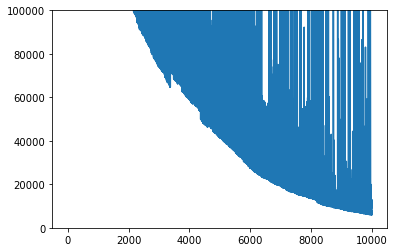

In [510]:
_, ax = plt.subplots(1,1)
ax.plot(lv)
ax.set_ylim((0,100000))

In [511]:
parms, lv = stochastic_gradient_descent(np.zeros(data_nyse.shape[1] - 1),
                                        data_nyse,
                                        MSE,
                                        epochs=1e4,
                                        calc_step=adadelta_step,
                                        step_state={"gamma":.9})

In [512]:
parms, min(lv)

(array([ 3.27878282e-01,  3.30590128e-01,  3.26869470e-01, -2.15284206e-06,
         1.50351326e-01,  1.14475198e-01,  1.71719720e-01,  1.19566576e-01,
         8.78188008e-02,  9.17144694e-02,  2.59558576e-01]),
 46.21090303320544)

(0.0, 4000.0)

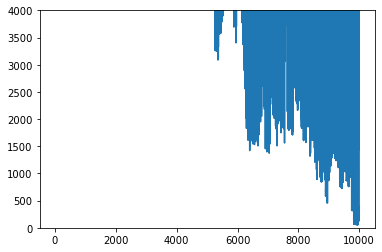

In [513]:
_, ax = plt.subplots(1,1)
ax.plot(lv)
ax.set_ylim((0,4000))

In [514]:
parms, lv = stochastic_gradient_descent(np.zeros(data_nyse.shape[1] - 1),
                                        data_nyse,
                                        MSE,
                                        epochs=1e4,
                                        calc_step=rmsprop_step,
                                        step_state={"gamma":.9, "eta":2e-3})

In [515]:
parms, min(lv)

(array([0.36048791, 0.36492241, 0.3591854 , 0.00395576, 0.26376941,
        0.0815838 , 0.38815897, 0.22335831, 0.01224048, 0.08040099,
        0.29647503]),
 27.32939767550299)

(0.0, 4000.0)

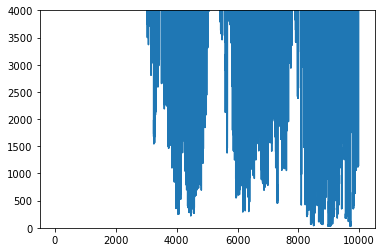

In [516]:
_, ax = plt.subplots(1,1)
ax.plot(lv)
ax.set_ylim((0,4000))

In [517]:
parms, lv = stochastic_gradient_descent(np.zeros(data_nyse.shape[1] - 1),
                                        data_nyse,
                                        MSE,
                                        epochs=1e4,
                                        calc_step=adam_step,
                                        step_state={"eta":5e-4})

In [518]:
parms, min(lv)

(array([ 3.23842091e-01,  3.25592484e-01,  3.22531548e-01, -1.41347538e-06,
         1.27870407e-01,  2.42246988e-01,  1.38514021e-01,  6.33643309e-02,
         6.03533496e-02,  1.22370082e-01,  2.64056187e-01]),
 181.47585910583334)

(0.0, 4000.0)

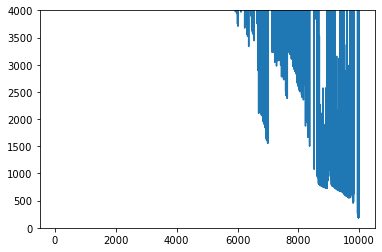

In [519]:
_, ax = plt.subplots(1,1)
ax.plot(lv)
ax.set_ylim((0,4000))

In [520]:
parms, lv = stochastic_gradient_descent(np.zeros(data_nyse.shape[1] - 1),
                                        data_nyse,
                                        MSE,
                                        epochs=1e4,
                                        calc_step=adamax_step,
                                        step_state={"eta":1e-2})

In [521]:
parms, min(lv)

(array([ 2.86923285e-01,  2.84680369e-01,  2.82868482e-01,  4.34409255e-05,
         1.11429599e-01, -5.38892474e-02, -5.43730366e-02,  9.99204126e-02,
        -3.52054214e-01,  7.35088670e-02,  2.35219261e-01]),
 92.67397256915974)

(0.0, 4000.0)

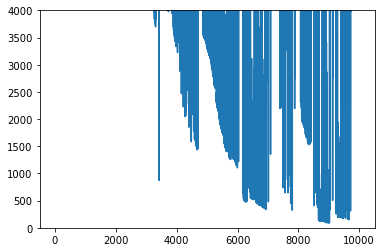

In [522]:
_, ax = plt.subplots(1,1)
ax.plot(lv)
ax.set_ylim((0,4000))

In [523]:
parms, lv = stochastic_gradient_descent(np.zeros(data_nyse.shape[1] - 1),
                                        data_nyse,
                                        MSE,
                                        epochs=1e4,
                                        calc_step=nadam_step,
                                        step_state={"eta":1e-3})

In [524]:
parms, min(lv)

(array([3.19501113e-01, 3.19103902e-01, 3.18408778e-01, 5.31329721e-06,
        2.21357195e-01, 9.36105244e-02, 2.12219794e-01, 1.43742416e-01,
        2.09414661e-02, 1.66169010e-01, 2.57711624e-01]),
 174.18060983392175)

(0.0, 4000.0)

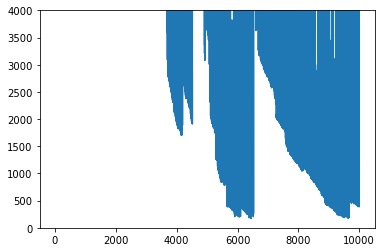

In [525]:
_, ax = plt.subplots(1,1)
ax.plot(lv)
ax.set_ylim((0,4000))

## Sklearn compair

In [562]:
from sklearn import linear_model
from sklearn import metrics

In [548]:
sgd_reg = linear_model.SGDRegressor?

In [566]:
sgd_reg = linear_model.SGDRegressor(eta0=1e-5)

In [567]:
sgd_reg.fit(data[:,:-2], data[:,-1])

SGDRegressor(eta0=1e-05)

In [568]:
sgd_reg.score(data[:,:-2], data[:,-1])

0.04273182671464948

In [569]:
sgd_reg.coef_

array([-0.10261144,  0.11476844, -0.07710444,  0.00486355,  0.1353468 ,
        0.05819938,  0.04323978,  0.00919643,  0.14982683,  0.04720026,
       -0.25577099,  0.01237527,  0.0015351 , -0.00230297,  0.00343954,
        0.00345437,  0.01523023, -0.00676578,  0.00720828, -0.00185118,
        0.00170642, -0.00620855])

In [570]:
metrics.mean_squared_error(sgd_reg.predict(data[:,:-2]), data[:,-1])

59.09858748275179

In [582]:
sgd_reg = linear_model.SGDRegressor(eta0=1e-17)

In [583]:
sgd_reg.fit(data_nyse[:,:-2], data_nyse[:,-1])

SGDRegressor(eta0=1e-17)

In [584]:
sgd_reg.score(data_nyse[:,:-2], data_nyse[:,-1])

-6.327253753328165

In [585]:
sgd_reg.coef_

array([6.78411900e-08, 6.74097248e-08, 6.82917114e-08, 1.07569858e-04,
       1.73366918e-11, 1.87085219e-11, 1.96285075e-11, 1.74389887e-11,
       1.33153796e-11, 1.09903869e-12])

In [586]:
metrics.mean_squared_error(sgd_reg.predict(data_nyse[:,:-2]), data_nyse[:,-1])

191877.29822037808